## Model Developement - Use Case :  Titanic

### Import RAI libary

In [2]:
from responsibleML import responsible_model as rai_model
from responsibleML import rai_models
from responsibleML import ProblemType
from responsibleML import ModelFramework

In [3]:
#Create a Model List
models = rai_models()

### Data Pre Processing

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [5]:
titanic_df = pd.read_csv('../data/titanic.csv')
titanic_df.head(3)

,target,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


In [6]:
# Remove all na value from test set 
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)

In [7]:
from sklearn import preprocessing

def encode_features(dataDF) :
    features = ['Sex','Embarked']
    
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,target,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,3
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,3
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,3
4,0,5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,3


In [8]:
# Drop the unnecessary field (PassengerId, Name, Ticket)
titanic_df.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

In [9]:
y_titanic_df = titanic_df['target']
X_titanic_df = titanic_df.drop('target', axis = 1)

### Model 1:  Decision Tree

#### 1.1 Decision Tree - RAI Model

In [10]:
# Create a responsible model
dt_model = rai_model("decision_tree", ProblemType.BINARY, ModelFramework.SKLEARN)

#### 1.2 Decision RAI Model:  Calculate Class Imbalance

In [11]:
# Calcualate Class Imbalance
dt_model.calculate_class_balance(y_titanic_df)

#### 1.3 Decision RAI Model:  Start Emissions Tracker

In [12]:
dt_model.start_emissions_tracker()

[codecarbon INFO @ 12:09:49] [setup] RAM Tracking...
[codecarbon INFO @ 12:09:49] [setup] GPU Tracking...
[codecarbon INFO @ 12:09:49] No GPU found.
[codecarbon INFO @ 12:09:49] [setup] CPU Tracking...
[codecarbon WARNING @ 12:09:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 12:09:51] We saw that you have a Intel(R) Xeon(R) Platinum 8175M CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:09:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8175M CPU @ 2.50GHz
[codecarbon INFO @ 12:09:51] >>> Tracker's metadata:
[codecarbon INFO @ 12:09:51]   Platform system: Linux-4.14.287-215.504.amzn2.x86_64-x86_64-with-glibc2.31
[codecarbon INFO @ 12:09:51]   Python version: 3.9.12
[codecarbon INFO @ 12:09:51]   Available RAM : 15.482 GB
[codecarbon INFO @ 12:09:51]   CPU count: 4
[codecarbon INFO @ 12:09:51]   CPU model: Intel(R) Xeon(R) Platinum 8175M CPU @ 2.50GHz
[codecarbon INFO @ 12:09:51]   GPU count: No

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state = 11)

dt_clf = DecisionTreeClassifier(random_state = 11)

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("== DecisionTree Accuracy : {0:.4f}".format(accuracy_score(y_test, dt_pred)))

== DecisionTree Accuracy : 0.7821


#### 1.4 Decision RAI Model:  Stop Emissions Tracker

In [14]:
# Stop the CO2 tracker
dt_model.stop_emissions_tracker()

[codecarbon INFO @ 12:09:51] Energy consumed for RAM : 0.000000 kWh. RAM Power : 5.805689334869385 W
[codecarbon INFO @ 12:09:51] Energy consumed for all CPUs : 0.000000 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:09:51] 0.000001 kWh of electricity used since the begining.


#### 1.5 Decision RAI Model:  Calculate Interpretability

In [15]:
# calculate Interpretability
dt_model.calculate_interpretability("treebased", dt_clf, X_titanic_df)

#### 1.6 Decision RAI Model:  Add model to RAI Models

In [16]:
models.add_model(dt_model)

In [17]:
print("Class Balance Index : " + str(dt_model.get_class_balance_index()))
print("Emissions Index : " + str(dt_model.get_emissions_index()))
print("Interpreability Index : " + str(dt_model.get_interpretability_index()))

Class Balance Index : 3
Emissions Index : 3
Interpreability Index : 3


In [18]:
dt_model.get_model_info()

'{"model name": "decision_tree", "framework": "sklearn", "ml problem": "binary_classification", "data type": "tabular", "model_accuracy": 0.0, "emissions": 3.6061114318880144e-07, "class_balance": 0.7676767676767676, "interpretability": 0.7372368829034679, "class balance Index": 3, "interpretability index": 3, "emission index": 3, "model_rai_index": 3.0}'

### Model 2:  Random Forest

#### 2.1 Random Forest - RAI Model

In [19]:
rf_model = rai_model("random_forest", ProblemType.BINARY, ModelFramework.SKLEARN)

#### 2.2 Random Forest RAI Model:  Calculate Class Imbalance

In [20]:
rf_model.calculate_class_balance(y_titanic_df)

#### 2.3 Random Forest RAI Model:  Start Emissions Tracker

In [21]:
rf_model.start_emissions_tracker()

[codecarbon INFO @ 12:09:51] [setup] RAM Tracking...
[codecarbon INFO @ 12:09:51] [setup] GPU Tracking...
[codecarbon INFO @ 12:09:51] No GPU found.
[codecarbon INFO @ 12:09:51] [setup] CPU Tracking...
[codecarbon WARNING @ 12:09:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 12:09:53] We saw that you have a Intel(R) Xeon(R) Platinum 8175M CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:09:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8175M CPU @ 2.50GHz
[codecarbon INFO @ 12:09:53] >>> Tracker's metadata:
[codecarbon INFO @ 12:09:53]   Platform system: Linux-4.14.287-215.504.amzn2.x86_64-x86_64-with-glibc2.31
[codecarbon INFO @ 12:09:53]   Python version: 3.9.12
[codecarbon INFO @ 12:09:53]   Available RAM : 15.482 GB
[codecarbon INFO @ 12:09:53]   CPU count: 4
[codecarbon INFO @ 12:09:53]   CPU model: Intel(R) Xeon(R) Platinum 8175M CPU @ 2.50GHz
[codecarbon INFO @ 12:09:53]   GPU count: No

In [22]:
#2. RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state = 11)

rf_clf = RandomForestClassifier(random_state = 11)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("== RandomForest Accuracy : {0:.4f}".format(accuracy_score(y_test, rf_pred)))

== RandomForest Accuracy : 0.8492


#### 2.4 Random Forest RAI Model:  Stop Emissions Tracker

In [23]:
rf_model.stop_emissions_tracker()

[codecarbon INFO @ 12:09:54] Energy consumed for RAM : 0.000001 kWh. RAM Power : 5.805689334869385 W
[codecarbon INFO @ 12:09:54] Energy consumed for all CPUs : 0.000004 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:09:54] 0.000004 kWh of electricity used since the begining.


#### 2.5 Random Forest RAI Model:  Calculate Interpretability

In [24]:
# calculate Interpretability
rf_model.calculate_interpretability("treebased", rf_clf, X_titanic_df)

#### 1.6 Random Forest RAI Model:  Add model to RAI Models

In [25]:
models.add_model(rf_model)

In [26]:
print("Class Balance Index : " + str(rf_model.get_class_balance_index()))
print("Emissions Index : " + str(rf_model.get_emissions_index()))
print("Interpreability Index : " + str(rf_model.get_interpretability_index()))

Class Balance Index : 3
Emissions Index : 3
Interpreability Index : 3


In [27]:
rf_model.get_model_info()

'{"model name": "random_forest", "framework": "sklearn", "ml problem": "binary_classification", "data type": "tabular", "model_accuracy": 0.0, "emissions": 2.8159332996555414e-06, "class_balance": 0.7676767676767676, "interpretability": 0.7214554847234195, "class balance Index": 3, "interpretability index": 3, "emission index": 3, "model_rai_index": 3.0}'

### Model 3:  Logistic Regression

#### 3.1 Logistic Regression - RAI Model

In [28]:
lr_model = rai_model("logistic_regression", ProblemType.BINARY, ModelFramework.SKLEARN)

#### 3.2 Logistic Regression RAI Model:  Calculate Class Imbalance

In [29]:
lr_model.calculate_class_balance(y_titanic_df)

#### 3.3 Logistic Regression RAI Model:  Start Emissions tracker

In [30]:
lr_model.start_emissions_tracker()

[codecarbon INFO @ 12:09:57] [setup] RAM Tracking...
[codecarbon INFO @ 12:09:57] [setup] GPU Tracking...
[codecarbon INFO @ 12:09:57] No GPU found.
[codecarbon INFO @ 12:09:57] [setup] CPU Tracking...
[codecarbon WARNING @ 12:09:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 12:09:59] We saw that you have a Intel(R) Xeon(R) Platinum 8175M CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:09:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8175M CPU @ 2.50GHz
[codecarbon INFO @ 12:09:59] >>> Tracker's metadata:
[codecarbon INFO @ 12:09:59]   Platform system: Linux-4.14.287-215.504.amzn2.x86_64-x86_64-with-glibc2.31
[codecarbon INFO @ 12:09:59]   Python version: 3.9.12
[codecarbon INFO @ 12:09:59]   Available RAM : 15.482 GB
[codecarbon INFO @ 12:09:59]   CPU count: 4
[codecarbon INFO @ 12:09:59]   CPU model: Intel(R) Xeon(R) Platinum 8175M CPU @ 2.50GHz
[codecarbon INFO @ 12:09:59]   GPU count: No

In [31]:
#3. LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state = 11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("== LogisticRegression Accuracy : {0:.4f}".format(accuracy_score(y_test, lr_pred)))

== LogisticRegression Accuracy : 0.8547


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


#### 3.4 Logistic Regression RAI Model:  Stop Emissions tracker

In [32]:
lr_model.stop_emissions_tracker()

[codecarbon INFO @ 12:09:59] Energy consumed for RAM : 0.000000 kWh. RAM Power : 5.805689334869385 W
[codecarbon INFO @ 12:09:59] Energy consumed for all CPUs : 0.000001 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 12:09:59] 0.000001 kWh of electricity used since the begining.


#### 3.5 Logistic Regression RAI Model:  Calculate Interpretability

In [33]:
# calculate Interpretability
lr_model.calculate_interpretability("linear", lr_clf, X_titanic_df)

The option feature_dependence has been renamed to feature_perturbation!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


#### 3.6 Logistic Regression RAI Model:  Add Model to RAI model list

In [34]:
models.add_model(lr_model)

### Calculate Responsible Index

#### List all models

In [35]:
# List all Models 
model_json = models.list_models()

In [36]:
# Rank them by RAI index
df_models = pd.read_json(model_json)

In [37]:
# Visualize
df_models.head(5)

,model name,framework,ml problem,data type,model_accuracy,emissions,class_balance,interpretability,class balance Index,interpretability index,emission index,model_rai_index
0,decision_tree,sklearn,binary_classification,tabular,0,3.606111e-07,0.767677,0.737237,3,3,3,3
1,random_forest,sklearn,binary_classification,tabular,0,2.815933e-06,0.767677,0.721455,3,3,3,3
2,logistic_regression,sklearn,binary_classification,tabular,0,4.507786e-07,0.767677,0.845180,3,3,3,3


In [38]:
from matplotlib import pyplot as plt


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='model name', ylabel='emissions'>

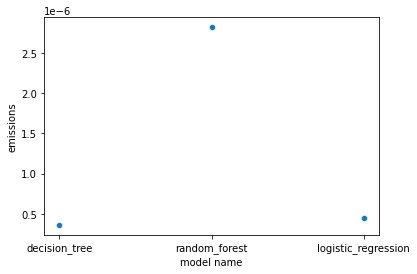

In [39]:
import seaborn as sns

#sns.lineplot('model name', 'interpretability', data=df_models)
sns.scatterplot('model name', 'emissions', data=df_models)

In [40]:
df_models.to_csv("temp.csv")